In [39]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [40]:

# Step 2: Load dataset (update path to your avocado.csv file)
df = pd.read_csv("avocado.csv", parse_dates=['Date'])

In [41]:
df.columns = df.columns.str.strip()  # clean column names

In [42]:
# Step 3: Extract date features, keep original Date column intact
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek

In [43]:
# Step 4: Cyclical encoding for Month and DayOfWeek for better modeling
df['MonthSin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['MonthCos'] = np.cos(2 * np.pi * df['Month'] / 12)
df['DayOfWeekSin'] = np.sin(2 * np.pi * df['DayOfWeek'] / 7)
df['DayOfWeekCos'] = np.cos(2 * np.pi * df['DayOfWeek'] / 7)

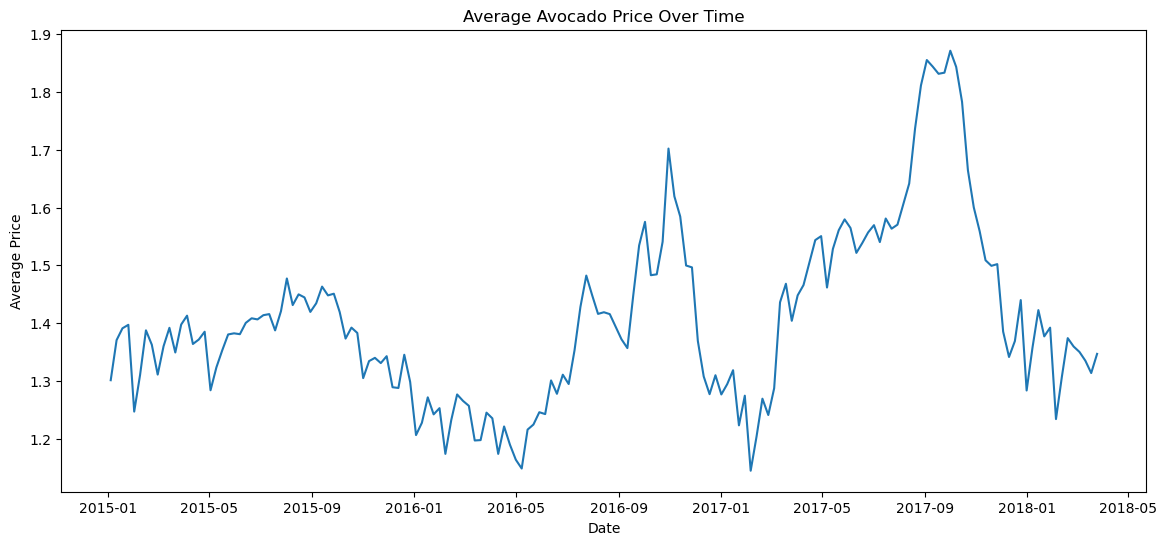

In [44]:
# Step 5: Plot average price trend
price_trend = df.groupby('Date')['AveragePrice'].mean().reset_index()
plt.figure(figsize=(14,6))
plt.plot(price_trend['Date'], price_trend['AveragePrice'])
plt.title('Average Avocado Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.show()

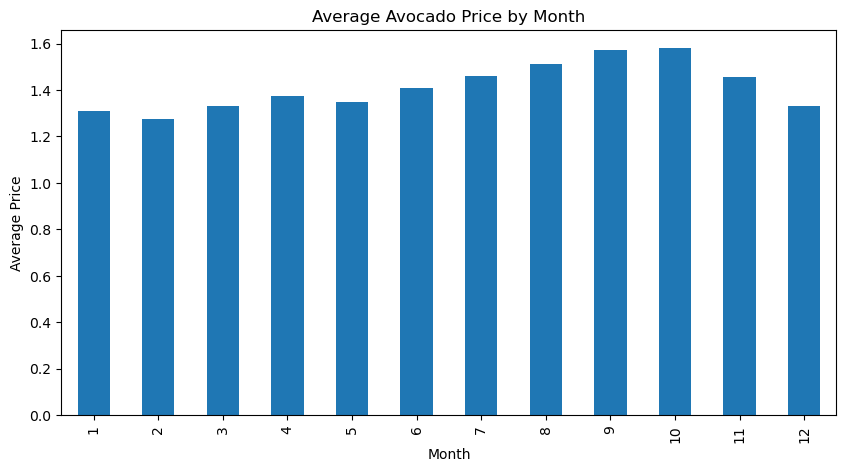

In [45]:
# Step 6: Plot seasonal average price
monthly_avg = df.groupby('Month')['AveragePrice'].mean()
plt.figure(figsize=(10,5))
monthly_avg.plot(kind='bar')
plt.title('Average Avocado Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

In [46]:
print(df.columns.tolist())


['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region', 'Year', 'Month', 'Day', 'DayOfWeek', 'MonthSin', 'MonthCos', 'DayOfWeekSin', 'DayOfWeekCos']


In [47]:
features = ['Year', 'MonthSin', 'MonthCos', 'DayOfWeekSin', 'DayOfWeekCos',
            'TotalVolume', 'plu4046', 'plu4225', 'plu4770',
            'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags']


In [48]:
X = df[features].fillna(0)
y = df['AveragePrice']


KeyError: "['TotalVolume', 'plu4046', 'plu4225', 'plu4770', 'TotalBags', 'SmallBags', 'LargeBags', 'XLargeBags'] not in index"

In [49]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

NameError: name 'X' is not defined

In [50]:
# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [51]:
# Predict & evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")

NameError: name 'X_test' is not defined

In [52]:
from sklearn.metrics import r2_score
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2: {r2:.4f}")


NameError: name 'mse' is not defined

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('Random Forest: Actual vs Predicted Avocado Prices')
plt.xlabel('Test Data Index')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: name 'y_test' is not defined

<Figure size 1200x600 with 0 Axes>

In [54]:
from prophet import Prophet


09:06:18 - cmdstanpy - INFO - Chain [1] start processing
09:06:18 - cmdstanpy - INFO - Chain [1] done processing


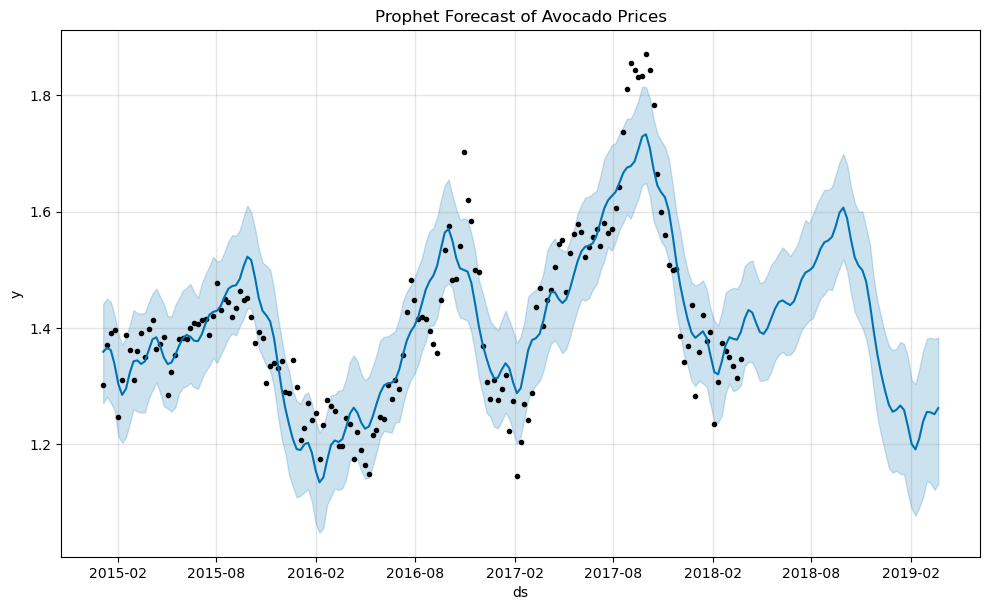

In [55]:
# Prepare data for Prophet
ts = df.groupby('Date')['AveragePrice'].mean().reset_index().rename(columns={'Date':'ds', 'AveragePrice':'y'})

model = Prophet()
model.fit(ts)

future = model.make_future_dataframe(periods=52, freq='W')  # Forecast 1 year ahead weekly
forecast = model.predict(future)

model.plot(forecast)
plt.title('Prophet Forecast of Avocado Prices')
plt.show()